In [1]:
from train import Fruits360Dataset
from torchvision.transforms import Normalize
import math
from torch.utils.data import DataLoader, Dataset

transform = Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]).cuda()
train_dataset = Fruits360Dataset('fruits-360/Training', transform)
test_dataset = Fruits360Dataset('fruits-360/Test', transform)
batch_size = math.ceil(len(train_dataset) / 10)
train_dataloader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        pin_memory=True)
test_dataloader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=True,
        pin_memory=True)

In [2]:
import pickle
def pickleAndSave(var_to_save, name):
    with open(name+'.pickle', 'wb') as file:
        pickle.dump(var_to_save, file, protocol=pickle.HIGHEST_PROTOCOL)
    print(f'{name} saved!')
    return

def getPickle(name):
    with open(name+'.pickle', 'rb') as file:
        var = pickle.load(file)
        print(f'{name} read!')
    return var

In [62]:
import matplotlib.pyplot as plt
import numpy as np

def plotResults(results):
    fig, ax = plt.subplots()
    ax.plot(results['train_accs'],'-x', label='Training Accuracy')
    ax.plot(results['test_accs'],'-x', label='Testing Accuracy')
    plt.title(f"{results['name']}")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    leg = ax.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot(results['train_losses'],'-x', label='Train')
    ax.plot(results['test_losses'],'-x', label='Loss')
    plt.title(f"{results['name']}")
    plt.xlabel('Epochs')
    plt.ylabel('CE Loss')
    leg = ax.legend()
    plt.show()


In [4]:
from torchvision import models
from torch.nn import Linear
from torch.optim import SGD
from train import train
import numpy as np
import torch.nn as nn
import torch
import sys

In [5]:
# name = 'shufflenet'
# model = models.shufflenet_v2_x0_5(pretrained=True)

# for param in model.parameters():
#     param.requires_grad = False

# model.fc = Linear(model.fc.in_features, num_classes)

# learning_rate = 38.4
# # weight_decay = learning_rate * 1e-3
# weight_decay = 0
# optimizer = SGD(model.fc.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=0.9)
# result = train(name, model, optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader, epochs=10)
# plotResults(result)
# pickleAndSave(result, name)

In [6]:
# resnet18 = models.resnet18(pretrained=True)
# alexnet = models.alexnet(pretrained=True)
# squeezenet = models.squeezenet1_0(pretrained=True)
# vgg16 = models.vgg16(pretrained=True)
# densenet = models.densenet161(pretrained=True)
# inception = models.inception_v3(pretrained=True)
# googlenet = models.googlenet(pretrained=True)
# shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
# mobilenet_v2 = models.mobilenet_v2(pretrained=True)
# mobilenet_v3_large = models.mobilenet_v3_large(pretrained=True)
# mobilenet_v3_small = models.mobilenet_v3_small(pretrained=True)
# resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
# wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
# mnasnet = models.mnasnet1_0(pretrained=True)

# for i,model in enumerate([resnet18, alexnet, squeezenet, vgg16, densenet, inception, googlenet, shufflenet, mobilenet_v2, mobilenet_v3_large, mobilenet_v3_small, resnext50_32x4d, wide_resnet50_2, mnasnet]):
#     for param in model.parameters():
#         param.requires_grad = False
#     try:
#         print(i, "model.fc", model.fc)
#     except:
#         try:
#             print(i, "model.classifier[-1]", model.classifier[-1], len(model.classifier))
#         except:
#             try:
#                 print(i, "model.classifier", model.classifier)
#             except:
#                 print("Nuke everyone")

In [73]:
num_classes = 67

def getModel(name = 'resnet18'):
    all_models = dict({
    'resnet18': models.resnet18(pretrained=True),
    'alexnet': models.alexnet(pretrained=True),
    'squeezenet': models.squeezenet1_0(pretrained=True),
    'vgg16': models.vgg16(pretrained=True),
    'densenet': models.densenet161(pretrained=True),
    'inception': models.inception_v3(pretrained=True),
    'googlenet': models.googlenet(pretrained=True),
    'shufflenet': models.shufflenet_v2_x1_0(pretrained=True),
    'mobilenet_v2': models.mobilenet_v2(pretrained=True),
    'mobilenet_v3_large': models.mobilenet_v3_large(pretrained=True),
    'mobilenet_v3_small': models.mobilenet_v3_small(pretrained=True),
    'resnext50_32x4d': models.resnext50_32x4d(pretrained=True),
    'wide_resnet50_2': models.wide_resnet50_2(pretrained=True),
    'mnasnet': models.mnasnet1_0(pretrained=True),
    })
    model = all_models[name]

#     learning_rates = { 
#     'resnet18' : 1.00, #
#     'googlenet' : 3, #
#     'resnext50_32x4d' : 3, #
#     'wide_resnet50_2' : 3, #
#     }
    for param in model.parameters():
        param.requires_grad = False
    if name == 'squeezenet':
        model.classifier[1] = nn.Conv2d(model.classifier[1].in_channels, num_classes, kernel_size=model.classifier[1].kernel_size, stride=model.classifier[1].stride)
    elif name == 'alexnet' or name == 'vgg16' or name == 'mobilenet_v2' or name == 'mobilenet_v3_large' or name == 'mobilenet_v3_small' or name == 'mnasnet':
        model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
    elif name == 'resnet18' or name == 'inception' or name == 'googlenet' or name == 'shufflenet' or name == 'resnext50_32x4d' or name == 'wide_resnet50_2':
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif name == 'densenet':
        model.classifier = nn.Sequential(nn.Dropout(0.3),nn.Linear(model.classifier.in_features, num_classes))
#     if name == 'resnet18':
#         model.fc = nn.Linear(model.,num_classes)
    
    return model

In [8]:
# name = 'shufflenet'
# model = getModel(name)

# learning_rate = 38.4
# weight_decay = 0
# optimizer = SGD(model.fc.parameters(), lr=learning_rate)
# result = train(name, model, optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader, epochs=10)
# plotResults(result)
# pickleAndSave(result, name)

In [9]:
# name = 'densenet'
# model = getModel(name)

# learning_rate = 0.001
# weight_decay = 0
# optimizer = SGD(model.parameters(), lr=learning_rate)
# result = train(name, model, optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader, epochs=10)
# plotResults(result)
# pickleAndSave(result, name)

Trying resnet18
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-04.
Epoch     3: reducing learning rate of group 0 to 2.5000e-04.
Epoch     5: reducing learning rate of group 0 to 1.2500e-04.
Epoch     6: reducing learning rate of group 0 to 6.2500e-05.
Epoch     7: reducing learning rate of group 0 to 3.1250e-05.
Epoch     8: reducing learning rate of group 0 to 1.5625e-05.
Epoch     9: reducing learning rate of group 0 to 7.8125e-06.
Epoch    10: reducing learning rate of group 0 to 3.9063e-06.
Epoch: 10 Train: 0.0574, 4.1905 Test: 0.0216, 4.4309

Time Taken: 80.68131756782532
resnet18 saved!
Trying alexnet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     6: reducing learning rate of group 0 to 5.0000e-04.
Epoch     9: reducing learning rate of group 0 to 2.5000e-04.
Epoch: 10 Train: 0.8066, 590.0770 Test: 0.3621, 7798.7729

Time Taken: 79.72539687156677
alexnet saved!
Trying squeezenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     9: reducing learning rate of group 0 to 5.0000e-04.
Epoch: 10 Train: 0.0431, 5.0757 Test: 0.0106, 5.1469

Time Taken: 78.75570058822632
squeezenet saved!
Trying vgg16
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: vgg16
Unexpected error: <class 'RuntimeError'>
Trying densenet
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: densenet
Unexpected error: <class 'RuntimeError'>
Trying inception
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: inception
Unexpected error: <class 'RuntimeError'>
Trying googlenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-04.
Epoch     3: reducing learning rate of group 0 to 2.5000e-04.
Epoch     4: reducing learning rate of group 0 to 1.2500e-04.
Epoch     5: reducing learning rate of group 0 to 6.2500e-05.
Epoch     6: reducing learning rate of group 0 to 3.1250e-05.
Epoch     7: reducing learning rate of group 0 to 1.5625e-05.
Epoch     8: reducing learning rate of group 0 to 7.8125e-06.
Epoch     9: reducing learning rate of group 0 to 3.9063e-06.
Epoch    10: reducing learning rate of group 0 to 1.9531e-06.
Epoch: 10 Train: 0.0552, 4.1370 Test: 0.0511, 4.2226

Time Taken: 84.12048316001892
googlenet saved!
Trying shufflenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-04.
Epoch     3: reducing learning rate of group 0 to 2.5000e-04.
Epoch     4: reducing learning rate of group 0 to 1.2500e-04.
Epoch     5: reducing learning rate of group 0 to 6.2500e-05.
Epoch     6: reducing learning rate of group 0 to 3.1250e-05.
Epoch     7: reducing learning rate of group 0 to 1.5625e-05.
Epoch     8: reducing learning rate of group 0 to 7.8125e-06.
Epoch     9: reducing learning rate of group 0 to 3.9063e-06.
Epoch    10: reducing learning rate of group 0 to 1.9531e-06.
Epoch: 10 Train: 0.0257, 4.2019 Test: 0.0311, 4.2001

Time Taken: 76.81745719909668
shufflenet saved!
Trying mobilenet_v2
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-04.
Epoch     3: reducing learning rate of group 0 to 2.5000e-04.
Epoch     4: reducing learning rate of group 0 to 1.2500e-04.
Epoch     6: reducing learning rate of group 0 to 6.2500e-05.
Epoch     7: reducing learning rate of group 0 to 3.1250e-05.
Epoch     8: reducing learning rate of group 0 to 1.5625e-05.
Epoch     9: reducing learning rate of group 0 to 7.8125e-06.
Epoch    10: reducing learning rate of group 0 to 3.9063e-06.
Epoch: 10 Train: 0.0652, 4.0874 Test: 0.0294, 4.2302

Time Taken: 82.59077429771423
mobilenet_v2 saved!
Trying mobilenet_v3_large
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-04.
Epoch     3: reducing learning rate of group 0 to 2.5000e-04.
Epoch     4: reducing learning rate of group 0 to 1.2500e-04.
Epoch     5: reducing learning rate of group 0 to 6.2500e-05.
Epoch     6: reducing learning rate of group 0 to 3.1250e-05.
Epoch     7: reducing learning rate of group 0 to 1.5625e-05.
Epoch     8: reducing learning rate of group 0 to 7.8125e-06.
Epoch     9: reducing learning rate of group 0 to 3.9063e-06.
Epoch    10: reducing learning rate of group 0 to 1.9531e-06.
Epoch: 10 Train: 0.0248, 4.2081 Test: 0.0104, 4.2450

Time Taken: 81.58952927589417
mobilenet_v3_large saved!
Trying mobilenet_v3_small
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-04.
Epoch     3: reducing learning rate of group 0 to 2.5000e-04.
Epoch     4: reducing learning rate of group 0 to 1.2500e-04.
Epoch     5: reducing learning rate of group 0 to 6.2500e-05.
Epoch     6: reducing learning rate of group 0 to 3.1250e-05.
Epoch     7: reducing learning rate of group 0 to 1.5625e-05.
Epoch     8: reducing learning rate of group 0 to 7.8125e-06.
Epoch     9: reducing learning rate of group 0 to 3.9063e-06.
Epoch    10: reducing learning rate of group 0 to 1.9531e-06.
Epoch: 10 Train: 0.0160, 4.2567 Test: 0.0213, 4.2357

Time Taken: 75.46530938148499
mobilenet_v3_small saved!
Trying resnext50_32x4d
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-04.
Epoch     3: reducing learning rate of group 0 to 2.5000e-04.
Epoch     4: reducing learning rate of group 0 to 1.2500e-04.
Epoch     6: reducing learning rate of group 0 to 6.2500e-05.
Epoch     7: reducing learning rate of group 0 to 3.1250e-05.
Epoch     8: reducing learning rate of group 0 to 1.5625e-05.
Epoch     9: reducing learning rate of group 0 to 7.8125e-06.
Epoch    10: reducing learning rate of group 0 to 3.9063e-06.
Epoch: 10 Train: 0.1114, 3.9712 Test: 0.0391, 4.1656

Time Taken: 252.34816694259644
resnext50_32x4d saved!
Trying wide_resnet50_2
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-04.
Epoch     3: reducing learning rate of group 0 to 2.5000e-04.
Epoch     4: reducing learning rate of group 0 to 1.2500e-04.
Epoch     5: reducing learning rate of group 0 to 6.2500e-05.
Epoch     6: reducing learning rate of group 0 to 3.1250e-05.
Epoch     7: reducing learning rate of group 0 to 1.5625e-05.
Epoch     8: reducing learning rate of group 0 to 7.8125e-06.
Epoch     9: reducing learning rate of group 0 to 3.9063e-06.
Epoch    10: reducing learning rate of group 0 to 1.9531e-06.
Epoch: 10 Train: 0.0917, 4.0303 Test: 0.0474, 4.1761

Time Taken: 334.4988842010498
wide_resnet50_2 saved!
Trying mnasnet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-04.
Epoch     3: reducing learning rate of group 0 to 2.5000e-04.
Epoch     4: reducing learning rate of group 0 to 1.2500e-04.
Epoch     5: reducing learning rate of group 0 to 6.2500e-05.
Epoch     6: reducing learning rate of group 0 to 3.1250e-05.
Epoch     7: reducing learning rate of group 0 to 1.5625e-05.
Epoch     8: reducing learning rate of group 0 to 7.8125e-06.
Epoch     9: reducing learning rate of group 0 to 3.9063e-06.
Epoch    10: reducing learning rate of group 0 to 1.9531e-06.
Epoch: 10 Train: 0.0362, 4.1578 Test: 0.0142, 5.6430

Time Taken: 81.65435004234314
mnasnet saved!


<ipython-input-3-cc1ea5beb9f8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


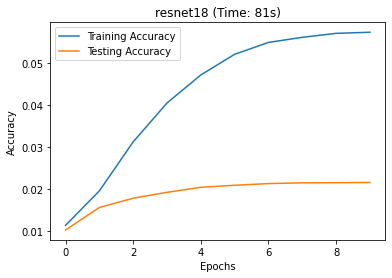

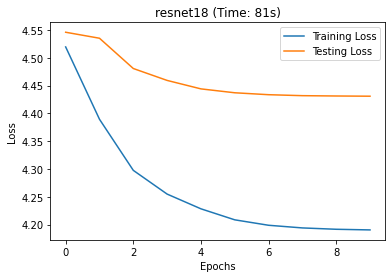

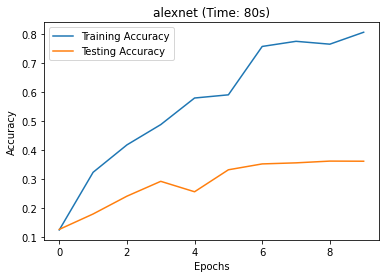

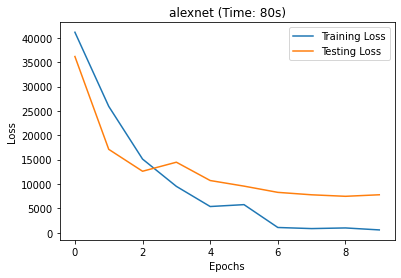

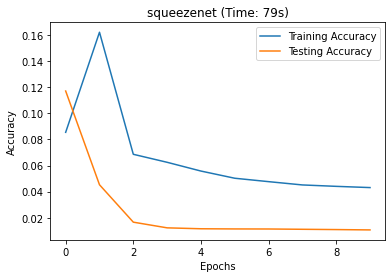

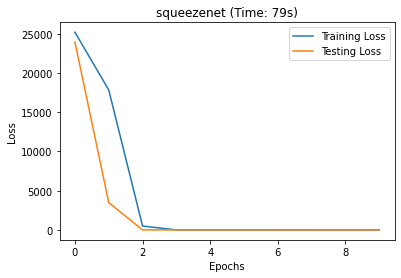

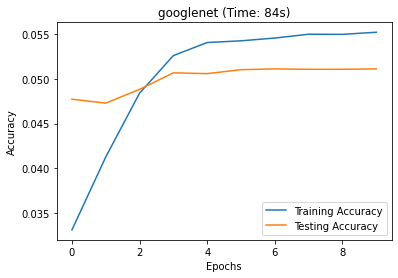

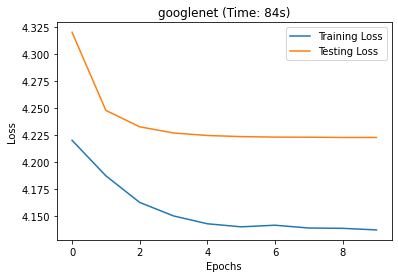

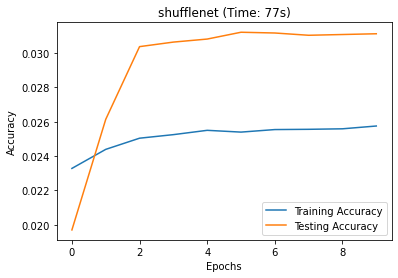

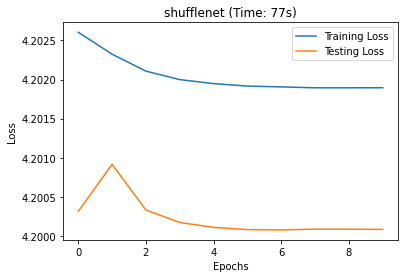

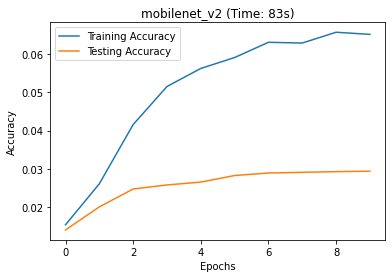

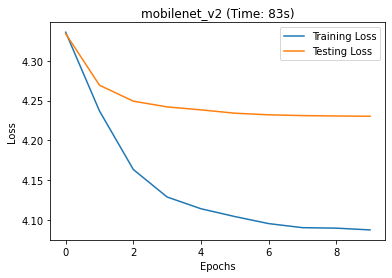

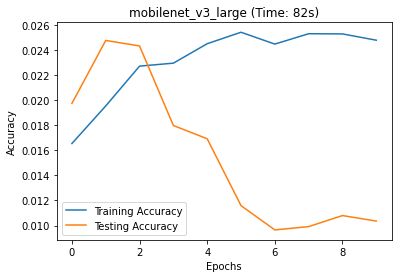

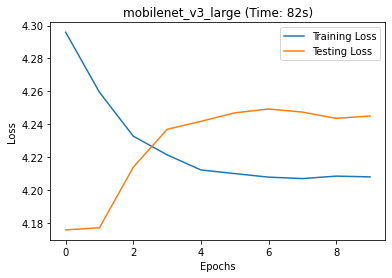

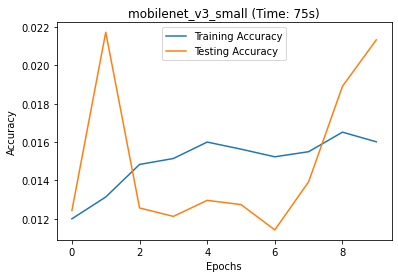

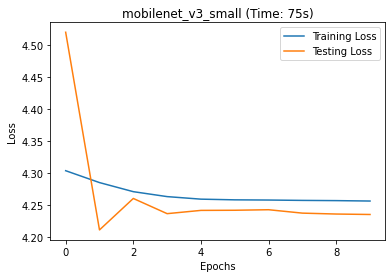

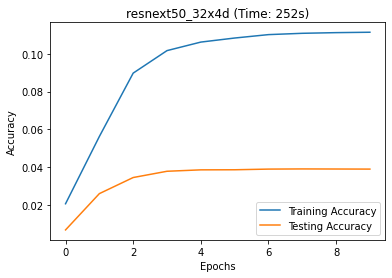

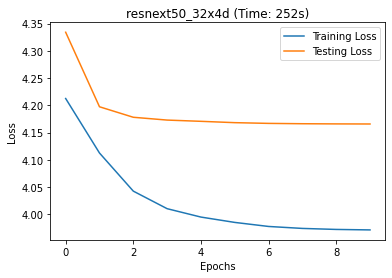

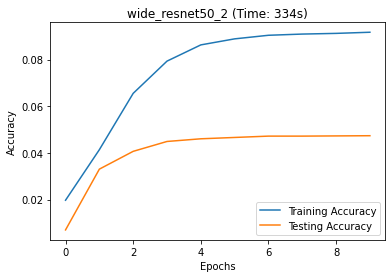

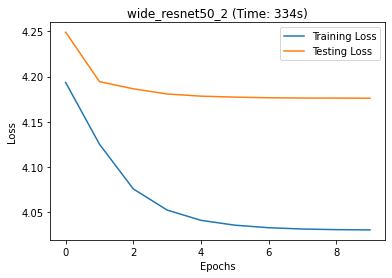

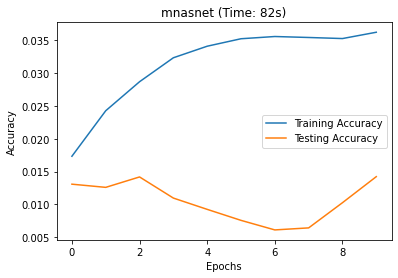

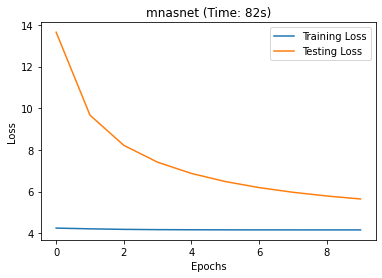

In [10]:
model_names = ['resnet18', 'alexnet', 'squeezenet', 'vgg16', 'densenet', 'inception', 'googlenet', 'shufflenet', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'resnext50_32x4d', 'wide_resnet50_2', 'mnasnet']
results = {}
errors = []
successes = []
for name in model_names:
    print(f'Trying {name}')
    try:
        model = getModel(name)
        learning_rate = 0.001
        optimizer = SGD(model.parameters(), lr=learning_rate)
        results[name] = train(name, model, optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader, epochs=10)
        plotResults(results[name])
        pickleAndSave(results[name], name)
        torch.cuda.empty_cache()
        successes.append(name)
    except:
        errors.append(name)
        print(f'Error in: {name}')
        print("Unexpected error:", sys.exc_info()[0])

Trying resnet18
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    28: reducing learning rate of group 0 to 1.0000e+01.
Epoch    30: reducing learning rate of group 0 to 5.0000e+00.
Epoch    33: reducing learning rate of group 0 to 2.5000e+00.
Epoch    34: reducing learning rate of group 0 to 1.2500e+00.
Epoch    35: reducing learning rate of group 0 to 6.2500e-01.
Epoch    37: reducing learning rate of group 0 to 3.1250e-01.
Epoch    38: reducing learning rate of group 0 to 1.5625e-01.
Epoch    39: reducing learning rate of group 0 to 7.8125e-02.
Epoch    40: reducing learning rate of group 0 to 3.9062e-02.
Epoch    41: reducing learning rate of group 0 to 1.9531e-02.
Epoch    42: reducing learning rate of group 0 to 9.7656e-03.
Epoch    43: reducing learning rate of group 0 to 4.8828e-03.
Epoch    44: reducing learning rate of group 0 to 2.4414e-03.
Epoch    45: reducing learning rate of group 0 to 1.2207e-03.
Epoch    46: reducing learning rate of group 0 to 6.1035e-04.
Epoch    47: reducing learning rate of group 0 to 3.0518e-04.
Epoch   

Epoch     6: reducing learning rate of group 0 to 1.0000e+01.0.0000
Epoch     9: reducing learning rate of group 0 to 5.0000e+00..00000
Epoch    17: reducing learning rate of group 0 to 2.5000e+00..00000
Epoch    19: reducing learning rate of group 0 to 1.2500e+00..0000
Epoch    20: reducing learning rate of group 0 to 6.2500e-01..0000
Epoch    22: reducing learning rate of group 0 to 3.1250e-01..0000
Epoch    23: reducing learning rate of group 0 to 1.5625e-01..0000
Epoch    24: reducing learning rate of group 0 to 7.8125e-02..0000
Epoch    25: reducing learning rate of group 0 to 3.9062e-02..0000
Epoch    26: reducing learning rate of group 0 to 1.9531e-02..0000
Epoch    27: reducing learning rate of group 0 to 9.7656e-03..0000
Epoch    28: reducing learning rate of group 0 to 4.8828e-03..0000
Epoch    29: reducing learning rate of group 0 to 2.4414e-03..0000
Epoch    30: reducing learning rate of group 0 to 1.2207e-03..0000
Epoch    31: reducing learning rate of group 0 to 6.1035e-0

Epoch    21: reducing learning rate of group 0 to 1.0000e+01.380000
Epoch    24: reducing learning rate of group 0 to 5.0000e+00.
Epoch    25: reducing learning rate of group 0 to 2.5000e+00.
Epoch    27: reducing learning rate of group 0 to 1.2500e+00.
Epoch    28: reducing learning rate of group 0 to 6.2500e-01.
Epoch    29: reducing learning rate of group 0 to 3.1250e-01.
Epoch    30: reducing learning rate of group 0 to 1.5625e-01.
Epoch    31: reducing learning rate of group 0 to 7.8125e-02.
Epoch    32: reducing learning rate of group 0 to 3.9062e-02.
Epoch    33: reducing learning rate of group 0 to 1.9531e-02.
Epoch    34: reducing learning rate of group 0 to 9.7656e-03.
Epoch    35: reducing learning rate of group 0 to 4.8828e-03.
Epoch    36: reducing learning rate of group 0 to 2.4414e-03.
Epoch    37: reducing learning rate of group 0 to 1.2207e-03.
Epoch    38: reducing learning rate of group 0 to 6.1035e-04.
Epoch    39: reducing learning rate of group 0 to 3.0518e-04.
Ep


Error in: vgg16
Unexpected error: <class 'RuntimeError'>
Trying densenet
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: densenet
Unexpected error: <class 'RuntimeError'>
Trying inception
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: inception
Unexpected error: <class 'RuntimeError'>
Trying googlenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    11: reducing learning rate of group 0 to 1.0000e+01.
Epoch    14: reducing learning rate of group 0 to 5.0000e+00.
Epoch    16: reducing learning rate of group 0 to 2.5000e+00.
Epoch    19: reducing learning rate of group 0 to 1.2500e+00.
Epoch    20: reducing learning rate of group 0 to 6.2500e-01.
Epoch    21: reducing learning rate of group 0 to 3.1250e-01.
Epoch    22: reducing learning rate of group 0 to 1.5625e-01.
Epoch    23: reducing learning rate of group 0 to 7.8125e-02.
Epoch    24: reducing learning rate of group 0 to 3.9062e-02.
Epoch    25: reducing learning rate of group 0 to 1.9531e-02.
Epoch    26: reducing learning rate of group 0 to 9.7656e-03.
Epoch    27: reducing learning rate of group 0 to 4.8828e-03.
Epoch    28: reducing learning rate of group 0 to 2.4414e-03.
Epoch    29: reducing learning rate of group 0 to 1.2207e-03.
Epoch    30: reducing learning rate of group 0 to 6.1035e-04.
Epoch    31: reducing learning rate of group 0 to 3.0518e-04.
Epoch   

Epoch    20: reducing learning rate of group 0 to 1.0000e+01.
Epoch    22: reducing learning rate of group 0 to 5.0000e+00.
Epoch    23: reducing learning rate of group 0 to 2.5000e+00.
Epoch    24: reducing learning rate of group 0 to 1.2500e+00.
Epoch    26: reducing learning rate of group 0 to 6.2500e-01.
Epoch    27: reducing learning rate of group 0 to 3.1250e-01.
Epoch    28: reducing learning rate of group 0 to 1.5625e-01.
Epoch    29: reducing learning rate of group 0 to 7.8125e-02.
Epoch    30: reducing learning rate of group 0 to 3.9062e-02.
Epoch    31: reducing learning rate of group 0 to 1.9531e-02.
Epoch    32: reducing learning rate of group 0 to 9.7656e-03.
Epoch    33: reducing learning rate of group 0 to 4.8828e-03.
Epoch    34: reducing learning rate of group 0 to 2.4414e-03.
Epoch    35: reducing learning rate of group 0 to 1.2207e-03.
Epoch    36: reducing learning rate of group 0 to 6.1035e-04.
Epoch    37: reducing learning rate of group 0 to 3.0518e-04.
Epoch   

Epoch    12: reducing learning rate of group 0 to 1.0000e+01.
Epoch    14: reducing learning rate of group 0 to 5.0000e+00.
Epoch    16: reducing learning rate of group 0 to 2.5000e+00.
Epoch    17: reducing learning rate of group 0 to 1.2500e+00.
Epoch    18: reducing learning rate of group 0 to 6.2500e-01.
Epoch    20: reducing learning rate of group 0 to 3.1250e-01.
Epoch    21: reducing learning rate of group 0 to 1.5625e-01.
Epoch    22: reducing learning rate of group 0 to 7.8125e-02.
Epoch    23: reducing learning rate of group 0 to 3.9062e-02.
Epoch    24: reducing learning rate of group 0 to 1.9531e-02.
Epoch    25: reducing learning rate of group 0 to 9.7656e-03.
Epoch    26: reducing learning rate of group 0 to 4.8828e-03.
Epoch    27: reducing learning rate of group 0 to 2.4414e-03.
Epoch    28: reducing learning rate of group 0 to 1.2207e-03.
Epoch    29: reducing learning rate of group 0 to 6.1035e-04.
Epoch    30: reducing learning rate of group 0 to 3.0518e-04.
Epoch   

Epoch     9: reducing learning rate of group 0 to 1.0000e+01.
Epoch    11: reducing learning rate of group 0 to 5.0000e+00.
Epoch    12: reducing learning rate of group 0 to 2.5000e+00.
Epoch    14: reducing learning rate of group 0 to 1.2500e+00.
Epoch    15: reducing learning rate of group 0 to 6.2500e-01.
Epoch    16: reducing learning rate of group 0 to 3.1250e-01.
Epoch    17: reducing learning rate of group 0 to 1.5625e-01.
Epoch    18: reducing learning rate of group 0 to 7.8125e-02.
Epoch    19: reducing learning rate of group 0 to 3.9062e-02.
Epoch    20: reducing learning rate of group 0 to 1.9531e-02.
Epoch    22: reducing learning rate of group 0 to 9.7656e-03.
Epoch    23: reducing learning rate of group 0 to 4.8828e-03.
Epoch    24: reducing learning rate of group 0 to 2.4414e-03.
Epoch    25: reducing learning rate of group 0 to 1.2207e-03.
Epoch    26: reducing learning rate of group 0 to 6.1035e-04.
Epoch    27: reducing learning rate of group 0 to 3.0518e-04.
Epoch   

Epoch    14: reducing learning rate of group 0 to 1.0000e+01.
Epoch    15: reducing learning rate of group 0 to 5.0000e+00.
Epoch    17: reducing learning rate of group 0 to 2.5000e+00.
Epoch    18: reducing learning rate of group 0 to 1.2500e+00.
Epoch    20: reducing learning rate of group 0 to 6.2500e-01.
Epoch    21: reducing learning rate of group 0 to 3.1250e-01.
Epoch    22: reducing learning rate of group 0 to 1.5625e-01.
Epoch    23: reducing learning rate of group 0 to 7.8125e-02.
Epoch    24: reducing learning rate of group 0 to 3.9062e-02.
Epoch    25: reducing learning rate of group 0 to 1.9531e-02.
Epoch    26: reducing learning rate of group 0 to 9.7656e-03.
Epoch    27: reducing learning rate of group 0 to 4.8828e-03.
Epoch    28: reducing learning rate of group 0 to 2.4414e-03.
Epoch    29: reducing learning rate of group 0 to 1.2207e-03.
Epoch    30: reducing learning rate of group 0 to 6.1035e-04.
Epoch    31: reducing learning rate of group 0 to 3.0518e-04.
Epoch   

Epoch    32: reducing learning rate of group 0 to 1.0000e+01.
Epoch    34: reducing learning rate of group 0 to 5.0000e+00.
Epoch    36: reducing learning rate of group 0 to 2.5000e+00.
Epoch    37: reducing learning rate of group 0 to 1.2500e+00.
Epoch    38: reducing learning rate of group 0 to 6.2500e-01.
Epoch    39: reducing learning rate of group 0 to 3.1250e-01.
Epoch    40: reducing learning rate of group 0 to 1.5625e-01.
Epoch    41: reducing learning rate of group 0 to 7.8125e-02.
Epoch    42: reducing learning rate of group 0 to 3.9062e-02.
Epoch    43: reducing learning rate of group 0 to 1.9531e-02.
Epoch    44: reducing learning rate of group 0 to 9.7656e-03.
Epoch    45: reducing learning rate of group 0 to 4.8828e-03.
Epoch    46: reducing learning rate of group 0 to 2.4414e-03.
Epoch    47: reducing learning rate of group 0 to 1.2207e-03.
Epoch    48: reducing learning rate of group 0 to 6.1035e-04.
Epoch    49: reducing learning rate of group 0 to 3.0518e-04.
Epoch   

Epoch    22: reducing learning rate of group 0 to 1.0000e+01.
Epoch    25: reducing learning rate of group 0 to 5.0000e+00.
Epoch    27: reducing learning rate of group 0 to 2.5000e+00.
Epoch    29: reducing learning rate of group 0 to 1.2500e+00.
Epoch    30: reducing learning rate of group 0 to 6.2500e-01.
Epoch    31: reducing learning rate of group 0 to 3.1250e-01.
Epoch    32: reducing learning rate of group 0 to 1.5625e-01.
Epoch    33: reducing learning rate of group 0 to 7.8125e-02.
Epoch    34: reducing learning rate of group 0 to 3.9062e-02.
Epoch    35: reducing learning rate of group 0 to 1.9531e-02.
Epoch    36: reducing learning rate of group 0 to 9.7656e-03.
Epoch    37: reducing learning rate of group 0 to 4.8828e-03.
Epoch    38: reducing learning rate of group 0 to 2.4414e-03.
Epoch    39: reducing learning rate of group 0 to 1.2207e-03.
Epoch    40: reducing learning rate of group 0 to 6.1035e-04.
Epoch    41: reducing learning rate of group 0 to 3.0518e-04.
Epoch   

Epoch    14: reducing learning rate of group 0 to 1.0000e+01.
Epoch    16: reducing learning rate of group 0 to 5.0000e+00.
Epoch    18: reducing learning rate of group 0 to 2.5000e+00.
Epoch    19: reducing learning rate of group 0 to 1.2500e+00.
Epoch    20: reducing learning rate of group 0 to 6.2500e-01.
Epoch    22: reducing learning rate of group 0 to 3.1250e-01.
Epoch    23: reducing learning rate of group 0 to 1.5625e-01.
Epoch    24: reducing learning rate of group 0 to 7.8125e-02.
Epoch    25: reducing learning rate of group 0 to 3.9062e-02.
Epoch    26: reducing learning rate of group 0 to 1.9531e-02.
Epoch    27: reducing learning rate of group 0 to 9.7656e-03.
Epoch    28: reducing learning rate of group 0 to 4.8828e-03.
Epoch    29: reducing learning rate of group 0 to 2.4414e-03.
Epoch    30: reducing learning rate of group 0 to 1.2207e-03.
Epoch    31: reducing learning rate of group 0 to 6.1035e-04.
Epoch    32: reducing learning rate of group 0 to 3.0518e-04.
Epoch   

<ipython-input-3-cc1ea5beb9f8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


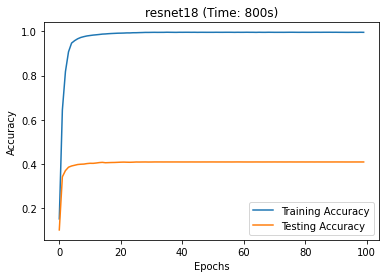

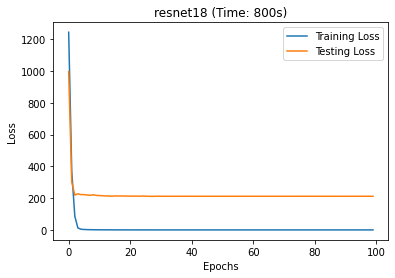

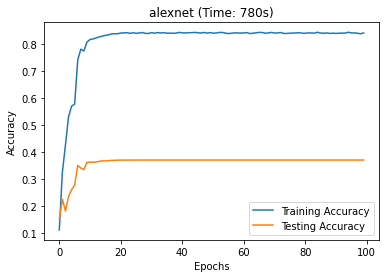

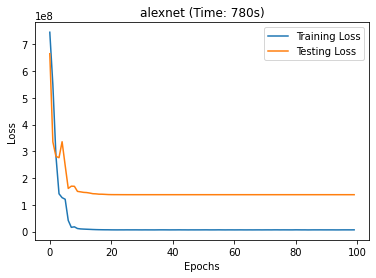

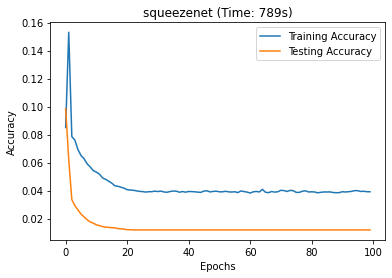

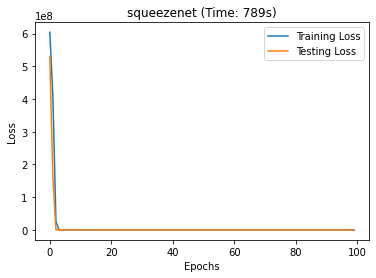

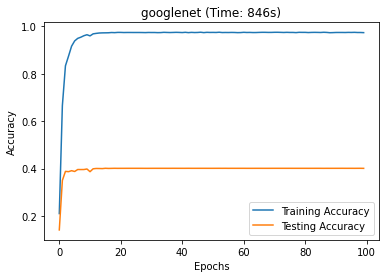

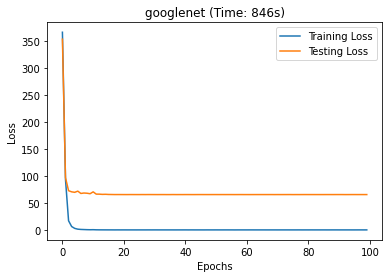

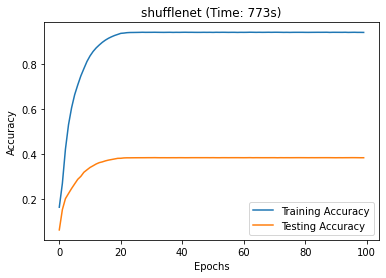

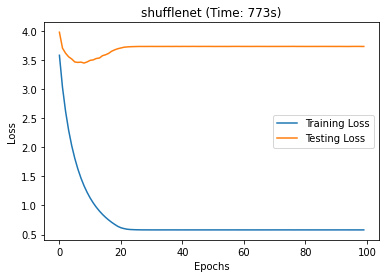

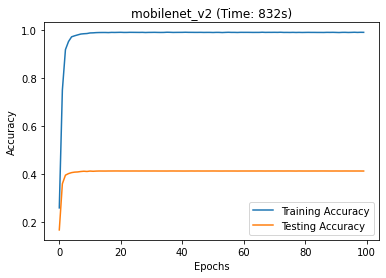

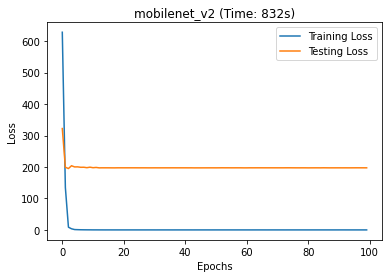

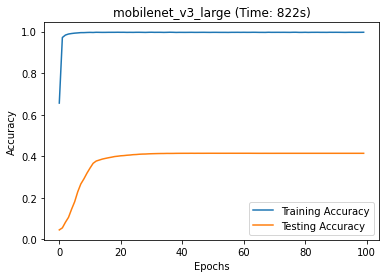

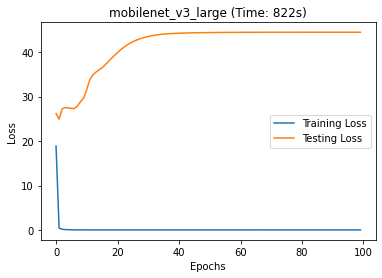

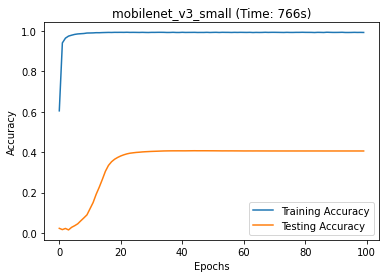

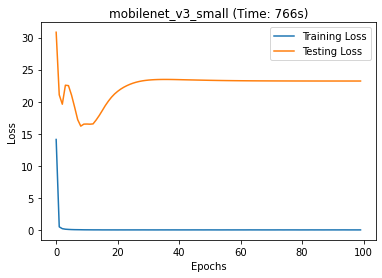

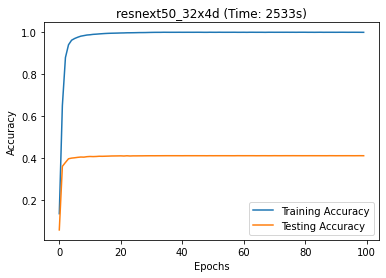

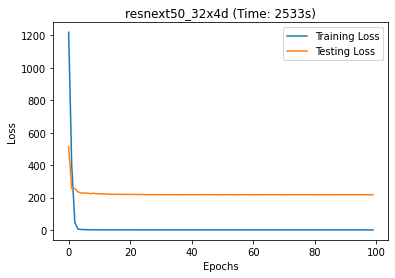

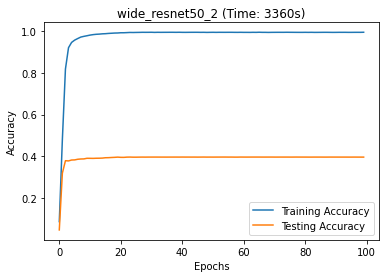

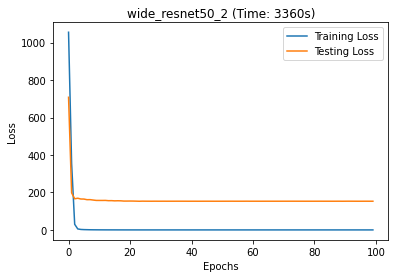

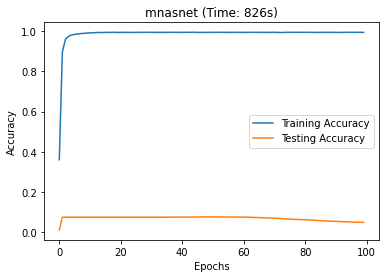

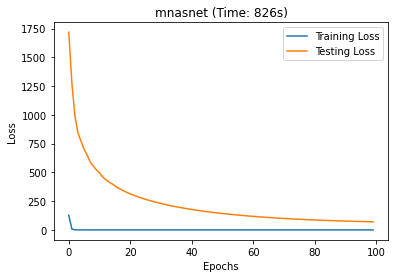

In [11]:
model_names = ['resnet18', 'alexnet', 'squeezenet', 'vgg16', 'densenet', 'inception', 'googlenet', 'shufflenet', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'resnext50_32x4d', 'wide_resnet50_2', 'mnasnet']
results = {}
errors = []
successes = []
for name in model_names:
    print(f'Trying {name}')
    try:
        model = getModel(name)
        learning_rate = 20
        optimizer = SGD(model.parameters(), lr=learning_rate)
        results[name] = train(name, model, optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader, epochs=100)
        plotResults(results[name])
        pickleAndSave(results[name], name)
        torch.cuda.empty_cache()
        successes.append(name)
    except:
        errors.append(name)
        print(f'Error in: {name}')
        print("Unexpected error:", sys.exc_info()[0])

Trying resnet18
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch: 20 Train: 0.9954, 0.0233 Test: 0.4115, 10.8416

Time Taken: 194.11041259765625


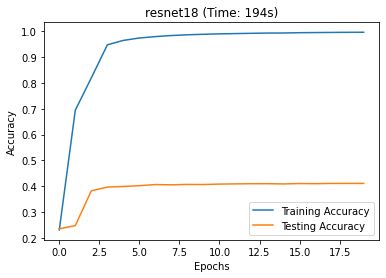

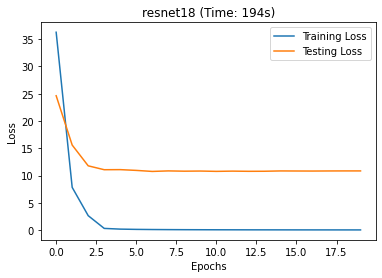

resnet18__2 saved!
Trying alexnet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     6: reducing learning rate of group 0 to 2.5000e+00.000000
Epoch     9: reducing learning rate of group 0 to 1.2500e+00.0000
Epoch    13: reducing learning rate of group 0 to 6.2500e-01.0000
Epoch    15: reducing learning rate of group 0 to 3.1250e-01.0000
Epoch    16: reducing learning rate of group 0 to 1.5625e-01.0000
Epoch    17: reducing learning rate of group 0 to 7.8125e-02.0000
Epoch    18: reducing learning rate of group 0 to 3.9062e-02.0000
Epoch    20: reducing learning rate of group 0 to 1.9531e-02.0000
Epoch: 20 Train: 0.8297, 2092899.8750 Test: 0.3652, 38096060.0000

Time Taken: 181.31829452514648


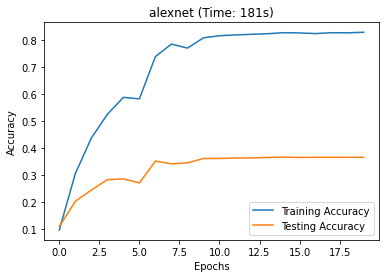

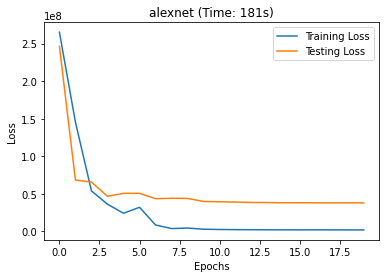

alexnet__2 saved!
Trying squeezenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    14: reducing learning rate of group 0 to 1.5000e+00.5000
Epoch    17: reducing learning rate of group 0 to 7.5000e-01.
Epoch    18: reducing learning rate of group 0 to 3.7500e-01.
Epoch: 20 Train: 0.0575, 897.9648 Test: 0.0204, 1832.6816

Time Taken: 173.14260411262512


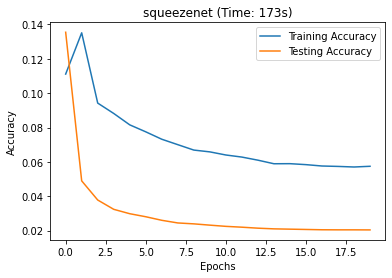

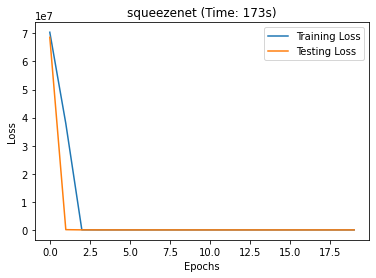

squeezenet__2 saved!
Trying vgg16
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: vgg16
Unexpected error: <class 'RuntimeError'>
Trying densenet
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: densenet
Unexpected error: <class 'RuntimeError'>
Trying inception
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: inception
Unexpected error: <class 'RuntimeError'>
Trying googlenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    17: reducing learning rate of group 0 to 1.5000e+00.
Epoch    19: reducing learning rate of group 0 to 7.5000e-01.
Epoch: 20 Train: 0.9829, 0.0633 Test: 0.4023, 11.3756

Time Taken: 184.7515037059784


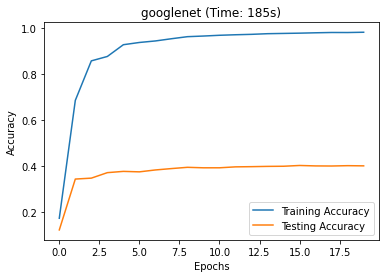

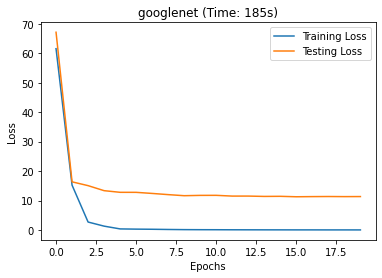

googlenet__2 saved!
Trying shufflenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     3: reducing learning rate of group 0 to 1.5000e+00.
Epoch     5: reducing learning rate of group 0 to 7.5000e-01.
Epoch     6: reducing learning rate of group 0 to 3.7500e-01.
Epoch     7: reducing learning rate of group 0 to 1.8750e-01.
Epoch     8: reducing learning rate of group 0 to 9.3750e-02.
Epoch     9: reducing learning rate of group 0 to 4.6875e-02.
Epoch    10: reducing learning rate of group 0 to 2.3438e-02.
Epoch    11: reducing learning rate of group 0 to 1.1719e-02.
Epoch    12: reducing learning rate of group 0 to 5.8594e-03.
Epoch    13: reducing learning rate of group 0 to 2.9297e-03.
Epoch    14: reducing learning rate of group 0 to 1.4648e-03.
Epoch    15: reducing learning rate of group 0 to 7.3242e-04.
Epoch    16: reducing learning rate of group 0 to 3.6621e-04.
Epoch    17: reducing learning rate of group 0 to 1.8311e-04.
Epoch    18: reducing learning rate of group 0 to 9.1553e-05.
Epoch    19: reducing learning rate of group 0 to 4.5776e-05.
Epoch   

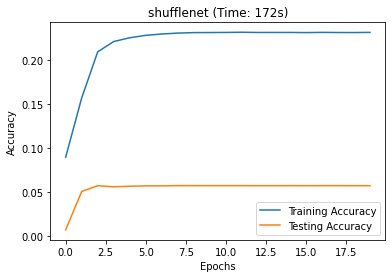

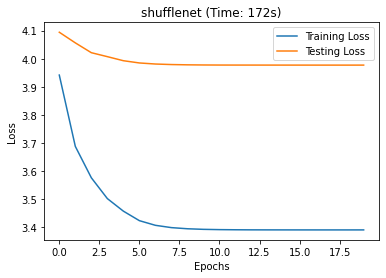

shufflenet__2 saved!
Trying mobilenet_v2
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    19: reducing learning rate of group 0 to 5.0000e-02.
Epoch: 20 Train: 0.9873, 0.1461 Test: 0.4150, 4.8571

Time Taken: 189.62359929084778


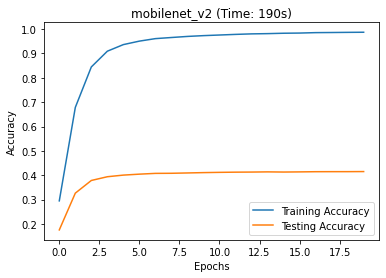

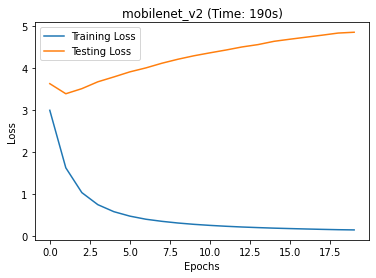

mobilenet_v2__2 saved!
Trying mobilenet_v3_large
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    19: reducing learning rate of group 0 to 5.0000e-02.
Epoch: 20 Train: 0.9809, 0.2024 Test: 0.3931, 4.1843

Time Taken: 180.03789520263672


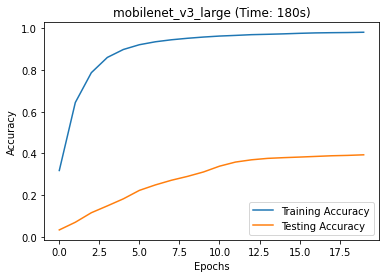

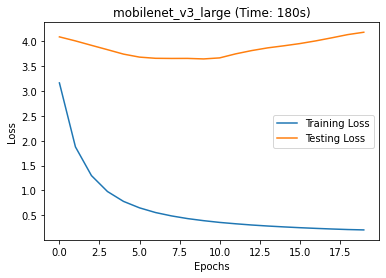

mobilenet_v3_large__2 saved!
Trying mobilenet_v3_small
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    17: reducing learning rate of group 0 to 5.0000e-02.
Epoch    19: reducing learning rate of group 0 to 2.5000e-02.
Epoch    20: reducing learning rate of group 0 to 1.2500e-02.
Epoch: 20 Train: 0.9246, 0.5130 Test: 0.3408, 4.0230

Time Taken: 171.3161265850067


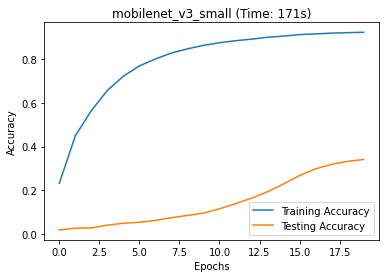

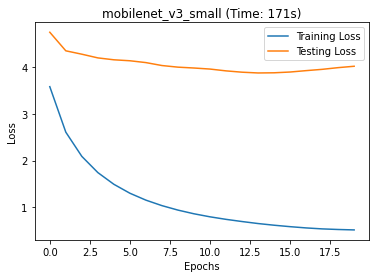

mobilenet_v3_small__2 saved!
Trying resnext50_32x4d
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch: 20 Train: 0.9943, 0.0333 Test: 0.4096, 33.127783

Time Taken: 508.4169111251831


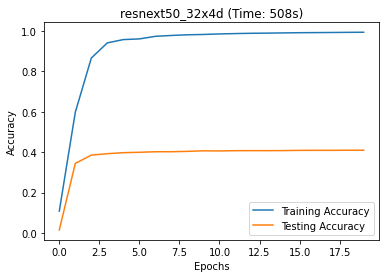

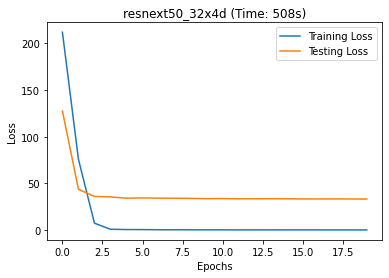

resnext50_32x4d__2 saved!
Trying wide_resnet50_2
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch: 20 Train: 0.9914, 0.0362 Test: 0.3957, 21.668990

Time Taken: 674.1107063293457


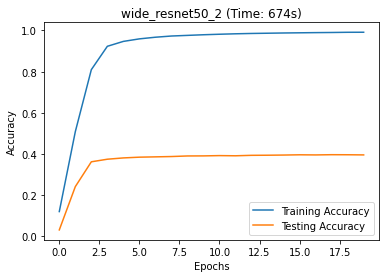

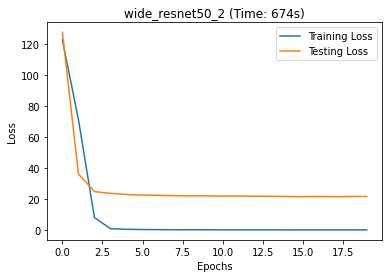

wide_resnet50_2__2 saved!
Trying mnasnet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    13: reducing learning rate of group 0 to 1.5000e+00.
Epoch    15: reducing learning rate of group 0 to 7.5000e-01.
Epoch    16: reducing learning rate of group 0 to 3.7500e-01.
Epoch    17: reducing learning rate of group 0 to 1.8750e-01.
Epoch    18: reducing learning rate of group 0 to 9.3750e-02.
Epoch    19: reducing learning rate of group 0 to 4.6875e-02.
Epoch: 20 Train: 0.9972, 0.0200 Test: 0.0744, 48.3410

Time Taken: 176.8493673801422


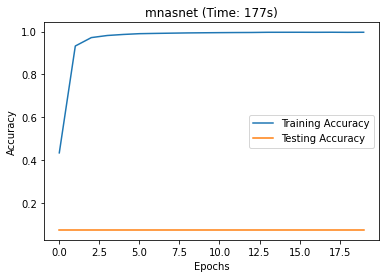

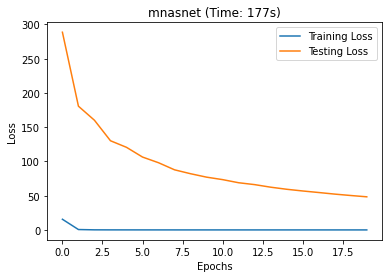

mnasnet__2 saved!


In [19]:
learning_rates = { 
'resnet18' : 1.00, #
'alexnet' : 5,
'squeezenet' : 3,
'vgg16' : 20,
'densenet' : 20,
'inception' : 20,
'googlenet' : 3, #
'shufflenet' : 3,
'mobilenet_v2' : 1e-1,
'mobilenet_v3_large' : 1e-1,
'mobilenet_v3_small' : 1e-1,
'resnext50_32x4d' : 3, #
'wide_resnet50_2' : 3, #
'mnasnet' : 3
}


model_names = ['resnet18', 'alexnet', 'squeezenet', 'vgg16', 'densenet', 'inception', 'googlenet', 'shufflenet', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'resnext50_32x4d', 'wide_resnet50_2', 'mnasnet']
suffix = '__2'
results = {}
errors = []
successes = []
for name in model_names:
    print(f'Trying {name}')
    try:
        model = getModel(name)
        learning_rate = 1.00 if name not in learning_rates else learning_rates[name]
        optimizer = SGD(model.parameters(), lr=learning_rate)
        results[name+suffix] = train(name, model, optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader, epochs=20)
        plotResults(results[name+suffix])
        pickleAndSave(results[name+suffix], name+suffix)
        torch.cuda.empty_cache()
        successes.append(name+suffix)
    except:
        errors.append(name)
        print(f'Error in: {name}')
        print("Unexpected error:", sys.exc_info()[0])

Trying resnet18
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-04.
Epoch     3: reducing learning rate of group 0 to 2.5000e-04.
Epoch     5: reducing learning rate of group 0 to 1.2500e-04.
Epoch     6: reducing learning rate of group 0 to 6.2500e-05.
Epoch     7: reducing learning rate of group 0 to 3.1250e-05.
Epoch     8: reducing learning rate of group 0 to 1.5625e-05.
Epoch     9: reducing learning rate of group 0 to 7.8125e-06.
Epoch    10: reducing learning rate of group 0 to 3.9063e-06.
Epoch    11: reducing learning rate of group 0 to 1.9531e-06.
Epoch    12: reducing learning rate of group 0 to 9.7656e-07.
Epoch    13: reducing learning rate of group 0 to 4.8828e-07.
Epoch    14: reducing learning rate of group 0 to 2.4414e-07.
Epoch    15: reducing learning rate of group 0 to 1.2207e-07.
Epoch    16: reducing learning rate of group 0 to 6.1035e-08.
Epoch    17: reducing learning rate of group 0 to 3.0518e-08.
Epoch    18: reducing learning rate of group 0 to 1.5259e-08.
Epoch: 2

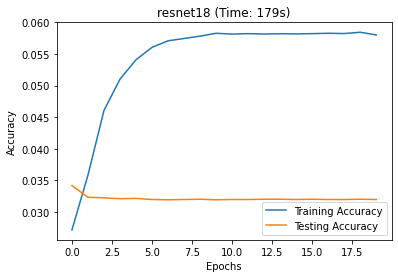

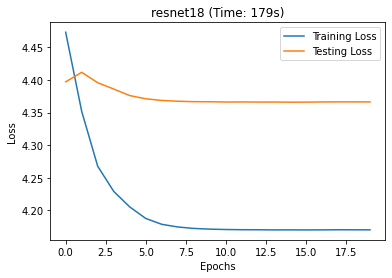

resnet18__3 saved!
Trying alexnet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     7: reducing learning rate of group 0 to 5.0000e-01.0000
Epoch    10: reducing learning rate of group 0 to 2.5000e-01.000
Epoch    13: reducing learning rate of group 0 to 1.2500e-01.00
Epoch    15: reducing learning rate of group 0 to 6.2500e-02.00
Epoch    17: reducing learning rate of group 0 to 3.1250e-02.00
Epoch    18: reducing learning rate of group 0 to 1.5625e-02.00
Epoch    19: reducing learning rate of group 0 to 7.8125e-03.00
Epoch    20: reducing learning rate of group 0 to 3.9062e-03.00
Epoch: 20 Train: 0.8302, 430274.2500 Test: 0.3676, 8103379.0000

Time Taken: 174.71089434623718


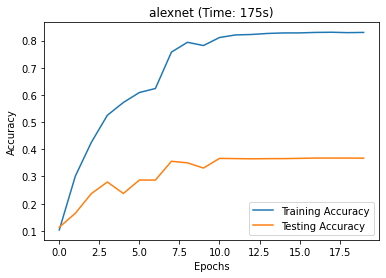

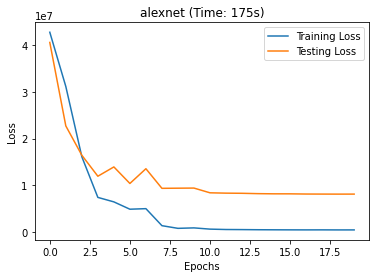

alexnet__3 saved!
Trying squeezenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    15: reducing learning rate of group 0 to 5.0000e-02.50
Epoch    17: reducing learning rate of group 0 to 2.5000e-02.
Epoch    19: reducing learning rate of group 0 to 1.2500e-02.
Epoch    20: reducing learning rate of group 0 to 6.2500e-03.
Epoch: 20 Train: 0.0827, 71.3433 Test: 0.0312, 286.3443

Time Taken: 174.22034406661987


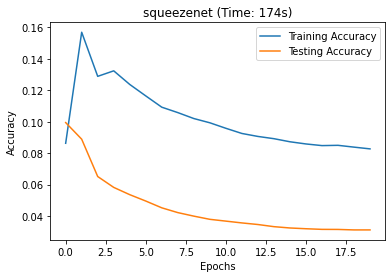

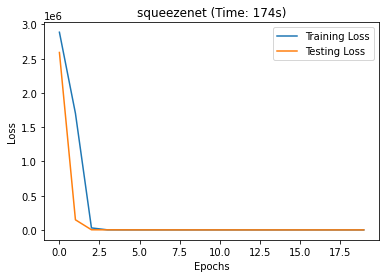

squeezenet__3 saved!
Trying vgg16
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: vgg16
Unexpected error: <class 'RuntimeError'>
Trying densenet
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: densenet
Unexpected error: <class 'RuntimeError'>
Trying inception
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: inception
Unexpected error: <class 'RuntimeError'>
Trying googlenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    17: reducing learning rate of group 0 to 5.0000e-02.
Epoch    19: reducing learning rate of group 0 to 2.5000e-02.
Epoch    20: reducing learning rate of group 0 to 1.2500e-02.
Epoch: 20 Train: 0.9095, 0.5857 Test: 0.3744, 3.9537

Time Taken: 185.6075210571289


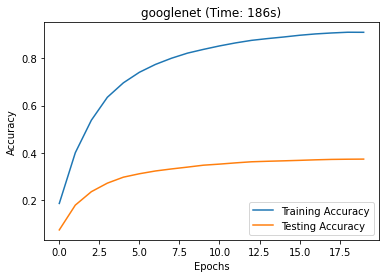

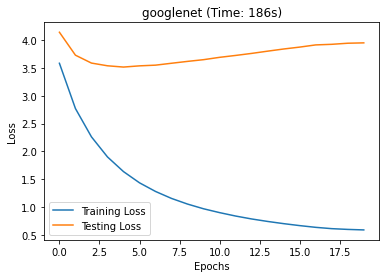

googlenet__3 saved!
Trying shufflenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-02.
Epoch     3: reducing learning rate of group 0 to 2.5000e-02.
Epoch     4: reducing learning rate of group 0 to 1.2500e-02.
Epoch     5: reducing learning rate of group 0 to 6.2500e-03.
Epoch     6: reducing learning rate of group 0 to 3.1250e-03.
Epoch     7: reducing learning rate of group 0 to 1.5625e-03.
Epoch     8: reducing learning rate of group 0 to 7.8125e-04.
Epoch     9: reducing learning rate of group 0 to 3.9063e-04.
Epoch    10: reducing learning rate of group 0 to 1.9531e-04.
Epoch    11: reducing learning rate of group 0 to 9.7656e-05.
Epoch    12: reducing learning rate of group 0 to 4.8828e-05.
Epoch    13: reducing learning rate of group 0 to 2.4414e-05.
Epoch    14: reducing learning rate of group 0 to 1.2207e-05.
Epoch    15: reducing learning rate of group 0 to 6.1035e-06.
Epoch    16: reducing learning rate of group 0 to 3.0518e-06.
Epoch    17: reducing learning rate of group 0 to 1.5259e-06.
Epoch   

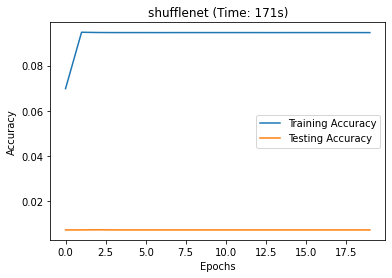

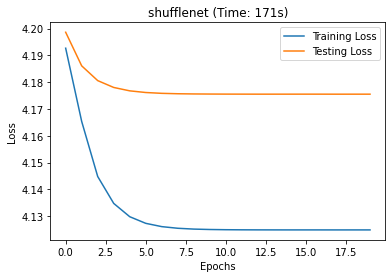

shufflenet__3 saved!
Trying mobilenet_v2
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-05.
Epoch     3: reducing learning rate of group 0 to 2.5000e-05.
Epoch     4: reducing learning rate of group 0 to 1.2500e-05.
Epoch     5: reducing learning rate of group 0 to 6.2500e-06.
Epoch     6: reducing learning rate of group 0 to 3.1250e-06.
Epoch     7: reducing learning rate of group 0 to 1.5625e-06.
Epoch     8: reducing learning rate of group 0 to 7.8125e-07.
Epoch     9: reducing learning rate of group 0 to 3.9063e-07.
Epoch    10: reducing learning rate of group 0 to 1.9531e-07.
Epoch    11: reducing learning rate of group 0 to 9.7656e-08.
Epoch    12: reducing learning rate of group 0 to 4.8828e-08.
Epoch    13: reducing learning rate of group 0 to 2.4414e-08.
Epoch    14: reducing learning rate of group 0 to 1.2207e-08.
Epoch: 20 Train: 0.0108, 4.3428 Test: 0.0140, 4.3248

Time Taken: 183.42861199378967


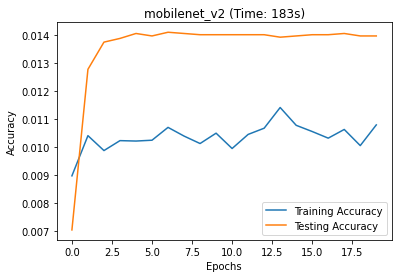

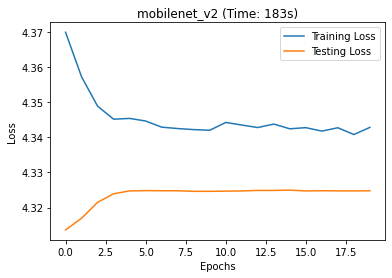

mobilenet_v2__3 saved!
Trying mobilenet_v3_large
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-05.
Epoch     3: reducing learning rate of group 0 to 2.5000e-05.
Epoch     4: reducing learning rate of group 0 to 1.2500e-05.
Epoch     5: reducing learning rate of group 0 to 6.2500e-06.
Epoch     6: reducing learning rate of group 0 to 3.1250e-06.
Epoch     7: reducing learning rate of group 0 to 1.5625e-06.
Epoch     8: reducing learning rate of group 0 to 7.8125e-07.
Epoch     9: reducing learning rate of group 0 to 3.9063e-07.
Epoch    10: reducing learning rate of group 0 to 1.9531e-07.
Epoch    11: reducing learning rate of group 0 to 9.7656e-08.
Epoch    12: reducing learning rate of group 0 to 4.8828e-08.
Epoch    13: reducing learning rate of group 0 to 2.4414e-08.
Epoch    14: reducing learning rate of group 0 to 1.2207e-08.
Epoch: 20 Train: 0.0140, 4.3440 Test: 0.0164, 4.2869

Time Taken: 180.83198761940002


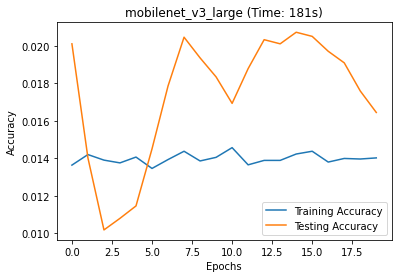

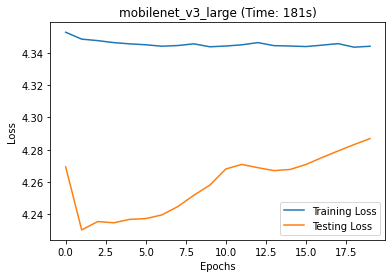

mobilenet_v3_large__3 saved!
Trying mobilenet_v3_small
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 5.0000e-05.
Epoch     3: reducing learning rate of group 0 to 2.5000e-05.
Epoch     4: reducing learning rate of group 0 to 1.2500e-05.
Epoch     5: reducing learning rate of group 0 to 6.2500e-06.
Epoch     6: reducing learning rate of group 0 to 3.1250e-06.
Epoch     7: reducing learning rate of group 0 to 1.5625e-06.
Epoch     8: reducing learning rate of group 0 to 7.8125e-07.
Epoch     9: reducing learning rate of group 0 to 3.9063e-07.
Epoch    10: reducing learning rate of group 0 to 1.9531e-07.
Epoch    11: reducing learning rate of group 0 to 9.7656e-08.
Epoch    12: reducing learning rate of group 0 to 4.8828e-08.
Epoch    13: reducing learning rate of group 0 to 2.4414e-08.
Epoch    14: reducing learning rate of group 0 to 1.2207e-08.
Epoch: 20 Train: 0.0143, 4.2941 Test: 0.0141, 4.2850

Time Taken: 169.62698316574097


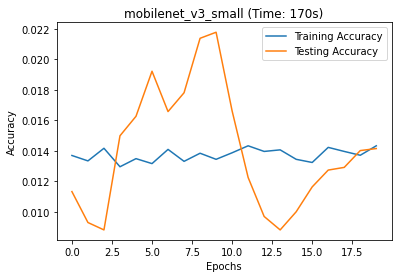

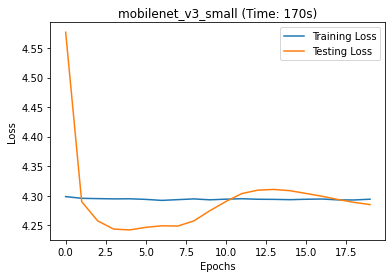

mobilenet_v3_small__3 saved!
Trying resnext50_32x4d
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    19: reducing learning rate of group 0 to 5.0000e-02.
Epoch: 20 Train: 0.9851, 0.1746 Test: 0.4092, 4.7493

Time Taken: 509.0581395626068


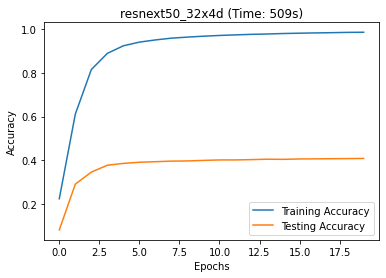

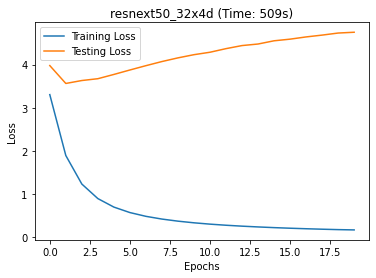

resnext50_32x4d__3 saved!
Trying wide_resnet50_2
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch: 10 Train: 0.9249, 0.6741 Test: 0.3778, 4.0110
Error in: wide_resnet50_2
Unexpected error: <class 'KeyboardInterrupt'>
Trying mnasnet
Current Device: NVIDIA GeForce RTX 3090
False
True



Error in: mnasnet
Unexpected error: <class 'KeyboardInterrupt'>


In [20]:
learning_rates = { 
'resnet18' : 1e-3, # x
'alexnet' : 1.,
'squeezenet' : 1e-1,
'vgg16' : 20,
'densenet' : 20,
'inception' : 20,
'googlenet' : 1e-1,
'shufflenet' : 1e-1,
'mobilenet_v2' : 1e-4,
'mobilenet_v3_large' : 1e-4,
'mobilenet_v3_small' : 1e-4,
'resnext50_32x4d' : 1e-1,
'wide_resnet50_2' : 1e-1,
'mnasnet' : 1e-1
}


model_names = ['resnet18', 'alexnet', 'squeezenet', 'vgg16', 'densenet', 'inception', 'googlenet', 'shufflenet', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'resnext50_32x4d', 'wide_resnet50_2', 'mnasnet']
suffix = '__3'
results = {}
errors = []
successes = []
for name in model_names:
    print(f'Trying {name}')
    try:
        model = getModel(name)
        learning_rate = 1.00 if name not in learning_rates else learning_rates[name]
        optimizer = SGD(model.parameters(), lr=learning_rate)
        results[name+suffix] = train(name, model, optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader, epochs=20)
        plotResults(results[name+suffix])
        pickleAndSave(results[name+suffix], name+suffix)
        torch.cuda.empty_cache()
        successes.append(name+suffix)
    except:
        errors.append(name)
        print(f'Error in: {name}')
        print("Unexpected error:", sys.exc_info()[0])

In [54]:
import importlib

nutrition = Nutrition.Nutrition()

print(nutrition.getFoodAmount(gender='M', age=42, class_name='Banana'))

136.23978201634878


In [32]:
print(all_nutrition['Apple'])

{'1263 SFA 12:0 (G)': '0.0', '1222 Alanine (G)': '', '1259 SFA 4:0 (G)': '0.0', '1101 Manganese, Mn (MG)': '', '1301 SFA 24:0 (G)': '', '1120 Cryptoxanthin, beta (UG)': '11.0', '1177 Folate, total (UG)': '3.0', '1278 PUFA 2:5 n-3 (EPA) (G)': '0.0', '1221 Histidine (G)': '', '1293 Fatty acids, total polyunsaturated (G)': '0.051', '1276 PUFA 18:4 (G)': '0.0', '1127 Tocopherol, delta (MG)': '', '1280 PUFA 22:5 n-3 (DPA) (G)': '0.0', '1110 Vitamin D (D2 + D3), International Units (IU)': '', '1253 Cholesterol (MG)': '0.0', '1313 PUFA 20:2 n-6 c,c (G)': '', '1091 Phosphorus, P (MG)': '11.0', '1018 Alcohol, ethyl (G)': '0.0', '1166 Riboflavin (MG)': '0.026', '1062 Energy (kJ)': '', '1104 Vitamin A, IU (IU)': '', '1092 Potassium, K (MG)': '107', '1008 Energy (KCAL)': '52.0', '1213 Leucine (G)': '', '1215 Methionine (G)': '', '1165 Thiamin (MG)': '0.017', 'name': 'Apple', '1279 MUFA 22:1 (G)': '0.0', '1130 Tocotrienol, gamma (MG)': '', '1214 Lysine (G)': '', '1125 Tocopherol, beta (MG)': '', '1

In [51]:
from

FileNotFoundError: [Errno 2] No such file or directory: './archive/fruits-360/Training/'

resnet18__2 read!
resnet18__2


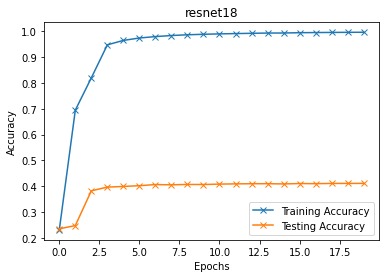

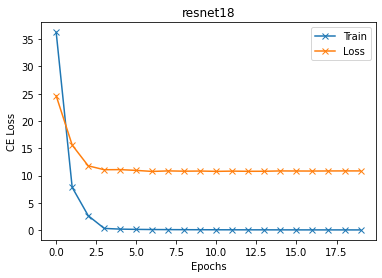

googlenet__2 read!
googlenet__2


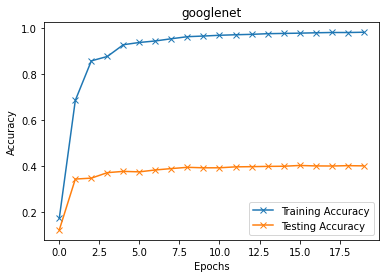

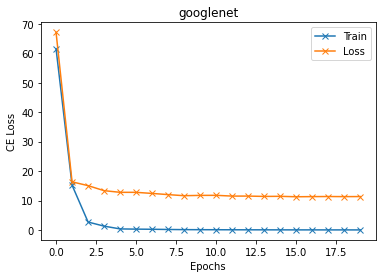

resnext50_32x4d__2 read!
resnext50_32x4d__2


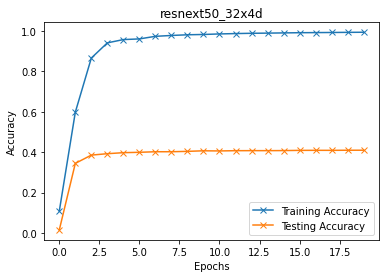

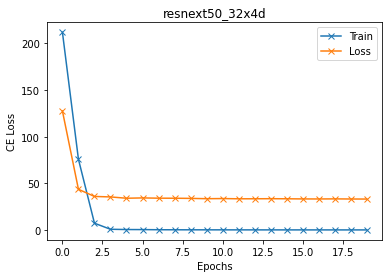

wide_resnet50_2__2 read!
wide_resnet50_2__2


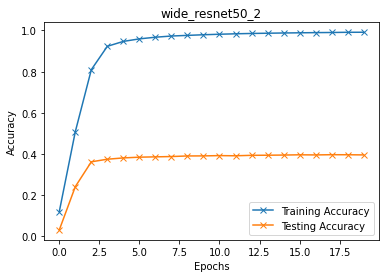

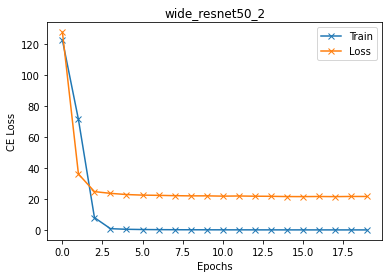

In [68]:
outputs = { 
'resnet18' : 1.00, #
'googlenet' : 3, #
'resnext50_32x4d' : 3, #
'wide_resnet50_2' : 3, #
}

suffixes = ['__2']


for model in outputs.keys():
    for suffix in suffixes:
        try:
            model_data = getPickle(model+suffix)
            print(model+suffix)
#             print(model_data['train_accs'][-1])
#             print(model_data['test_accs'][-1])
            plotResults(model_data)
        except:
            print(f'{model+suffix} not found')



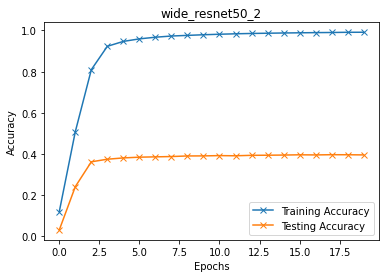

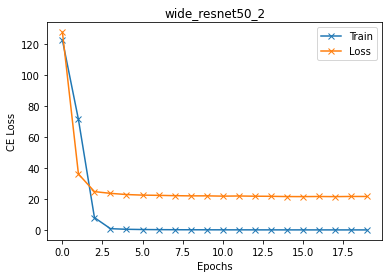

In [66]:
plotResults(model_data)

Trying resnet18
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch: 20 Train: 0.9935, 0.0282 Test: 0.4134, 12.0979

Time Taken: 177.56103444099426


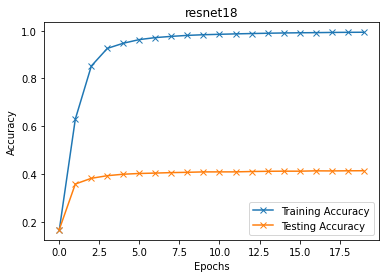

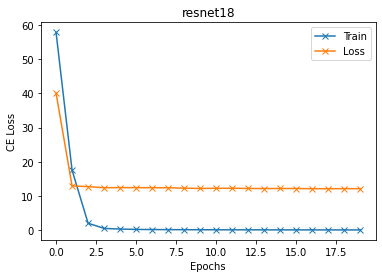

resnet18__dropout saved!
Trying googlenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch    17: reducing learning rate of group 0 to 1.5000e+00.
Epoch    18: reducing learning rate of group 0 to 7.5000e-01.
Epoch: 20 Train: 0.9830, 0.0628 Test: 0.4022, 10.0012

Time Taken: 185.91811084747314


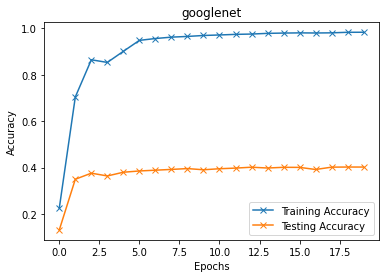

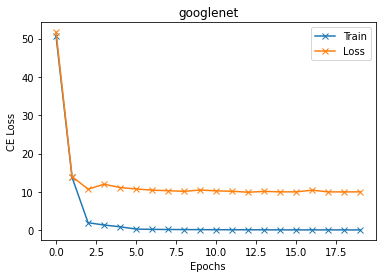

googlenet__dropout saved!
Trying resnext50_32x4d
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch: 20 Train: 0.9947, 0.0271 Test: 0.4103, 31.293992

Time Taken: 507.69347047805786


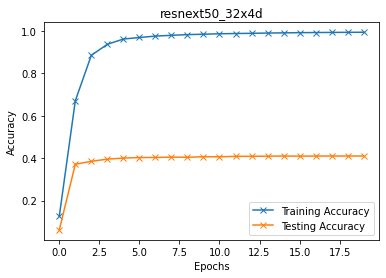

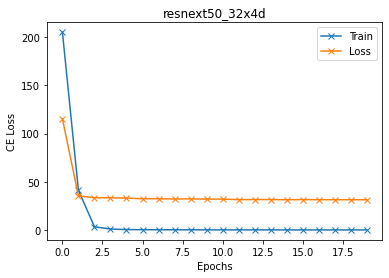

resnext50_32x4d__dropout saved!
Trying wide_resnet50_2
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch: 20 Train: 0.9925, 0.0310 Test: 0.3994, 21.245833

Time Taken: 672.9281878471375


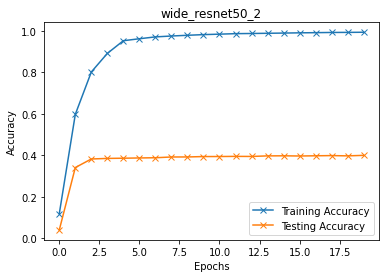

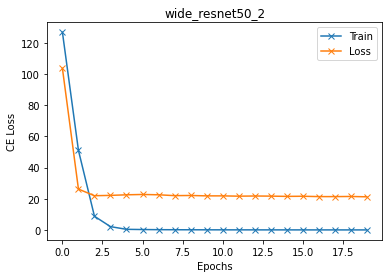

wide_resnet50_2__dropout saved!


In [72]:
learning_rates = { 
'resnet18' : 1.00, #
'googlenet' : 3, #
'resnext50_32x4d' : 3, #
'wide_resnet50_2' : 3, #
}


model_names = learning_rates.keys()
suffix = '__dropout'
results = {}
errors = []
successes = []
for name in model_names:
    print(f'Trying {name}')
    try:
        model = getModel(name)
        learning_rate = 1.00 if name not in learning_rates else learning_rates[name]
        optimizer = SGD(model.parameters(), lr=learning_rate)
        results[name+suffix] = train(name, model, optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader, epochs=20)
        plotResults(results[name+suffix])
        pickleAndSave(results[name+suffix], name+suffix)
        torch.cuda.empty_cache()
        successes.append(name+suffix)
    except:
        errors.append(name)
        print(f'Error in: {name}')
        print("Unexpected error:", sys.exc_info()[0])

Trying resnet18
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     4: reducing learning rate of group 0 to 5.0000e-01.
Epoch     8: reducing learning rate of group 0 to 2.5000e-01.
Epoch    11: reducing learning rate of group 0 to 1.2500e-01.
Epoch    12: reducing learning rate of group 0 to 6.2500e-02.
Epoch    13: reducing learning rate of group 0 to 3.1250e-02.
Epoch    14: reducing learning rate of group 0 to 1.5625e-02.
Epoch    15: reducing learning rate of group 0 to 7.8125e-03.
Epoch    16: reducing learning rate of group 0 to 3.9062e-03.
Epoch    17: reducing learning rate of group 0 to 1.9531e-03.
Epoch    18: reducing learning rate of group 0 to 9.7656e-04.
Epoch    19: reducing learning rate of group 0 to 4.8828e-04.
Epoch    20: reducing learning rate of group 0 to 2.4414e-04.
Epoch: 20 Train: 0.9633, 0.5509 Test: 0.3943, 3.6640

Time Taken: 175.97519421577454


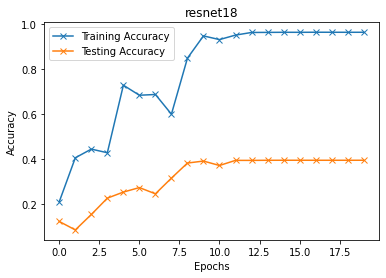

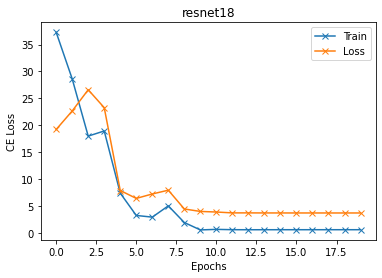

resnet18__L2_decay saved!
Trying googlenet
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 1.5000e+00.
Epoch     6: reducing learning rate of group 0 to 7.5000e-01.
Epoch    10: reducing learning rate of group 0 to 3.7500e-01.
Epoch    13: reducing learning rate of group 0 to 1.8750e-01.
Epoch    15: reducing learning rate of group 0 to 9.3750e-02.
Epoch    16: reducing learning rate of group 0 to 4.6875e-02.
Epoch    17: reducing learning rate of group 0 to 2.3438e-02.
Epoch    18: reducing learning rate of group 0 to 1.1719e-02.
Epoch    19: reducing learning rate of group 0 to 5.8594e-03.
Epoch    20: reducing learning rate of group 0 to 2.9297e-03.
Epoch: 20 Train: 0.8482, 1.1933 Test: 0.3430, 3.4359

Time Taken: 183.56880903244019


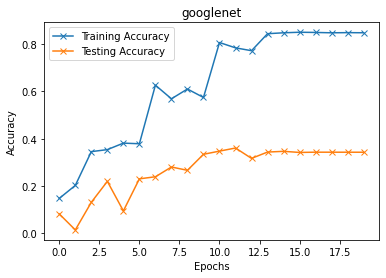

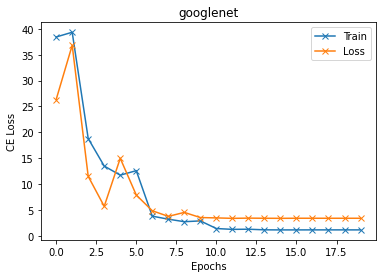

googlenet__L2_decay saved!
Trying resnext50_32x4d
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 1.5000e+00.
Epoch     5: reducing learning rate of group 0 to 7.5000e-01.
Epoch     8: reducing learning rate of group 0 to 3.7500e-01.
Epoch    11: reducing learning rate of group 0 to 1.8750e-01.
Epoch    14: reducing learning rate of group 0 to 9.3750e-02.
Epoch    15: reducing learning rate of group 0 to 4.6875e-02.
Epoch    16: reducing learning rate of group 0 to 2.3438e-02.
Epoch    17: reducing learning rate of group 0 to 1.1719e-02.
Epoch    18: reducing learning rate of group 0 to 5.8594e-03.
Epoch    19: reducing learning rate of group 0 to 2.9297e-03.
Epoch    20: reducing learning rate of group 0 to 1.4648e-03.
Epoch: 20 Train: 0.9675, 0.5507 Test: 0.3981, 3.6805

Time Taken: 507.63338232040405


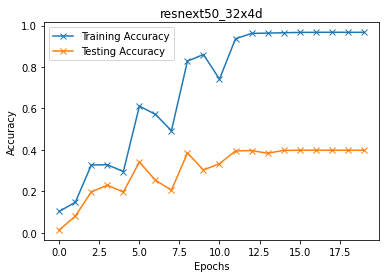

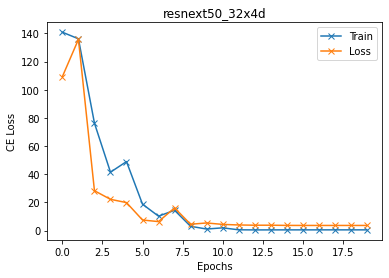

resnext50_32x4d__L2_decay saved!
Trying wide_resnet50_2
Current Device: NVIDIA GeForce RTX 3090
False
True


Epoch     2: reducing learning rate of group 0 to 1.5000e+00.
Epoch     5: reducing learning rate of group 0 to 7.5000e-01.
Epoch     9: reducing learning rate of group 0 to 3.7500e-01.
Epoch    12: reducing learning rate of group 0 to 1.8750e-01.
Epoch    15: reducing learning rate of group 0 to 9.3750e-02.
Epoch    16: reducing learning rate of group 0 to 4.6875e-02.
Epoch    17: reducing learning rate of group 0 to 2.3438e-02.
Epoch    18: reducing learning rate of group 0 to 1.1719e-02.
Epoch    19: reducing learning rate of group 0 to 5.8594e-03.
Epoch    20: reducing learning rate of group 0 to 2.9297e-03.
Epoch: 20 Train: 0.9242, 0.9258 Test: 0.3692, 3.6396

Time Taken: 672.5572755336761


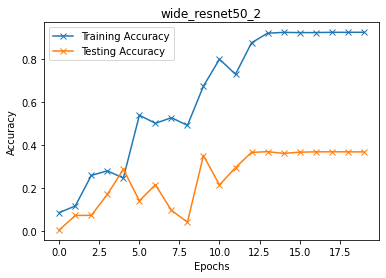

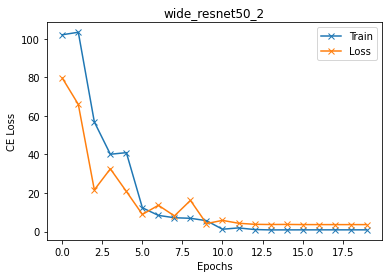

wide_resnet50_2__L2_decay saved!


In [75]:
learning_rates = { 
'resnet18' : 1.00, #
'googlenet' : 3, #
'resnext50_32x4d' : 3, #
'wide_resnet50_2' : 3, #
}


model_names = learning_rates.keys()
suffix = '__L2_decay'
results = {}
errors = []
successes = []
for name in model_names:
    print(f'Trying {name}')
    try:
        model = getModel(name)
        learning_rate = 1.00 if name not in learning_rates else learning_rates[name]
        optimizer = SGD(model.parameters(), lr=learning_rate, weight_decay=0.1)
        results[name+suffix] = train(name, model, optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader, epochs=20)
        plotResults(results[name+suffix])
        pickleAndSave(results[name+suffix], name+suffix)
        torch.cuda.empty_cache()
        successes.append(name+suffix)
    except:
        errors.append(name)
        print(f'Error in: {name}')
        print("Unexpected error:", sys.exc_info()[0])